# Problem Statement
XYZ Co's 2014-2018 sales data to identify key revenue and profit
drivers across products, channels, and regions, uncover seasonal
trends and outliers, and align performance against budgets. use these
insights to optimize pricing, promotions and market expansion fer
sustainable growth and reduced concentration risk.

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheets= pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name=None)

In [ ]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [ ]:
df_sales= sheets['Sales Orders']
df_customers= sheets['Customers']
df_products= sheets['Products']
df_regions= sheets['Regions']
df_state_reg= sheets['State Regions']
df_budgets= sheets['2017 Budgets']

In [ ]:
df_sales.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_sales.shape

(64104, 12)

In [ ]:
print("df_sales shape :",df_sales.shape)
print("df_customers shape :",df_customers.shape)
print("df_products shape :",df_products.shape)
print("df_regions shape :",df_regions.shape)
print("df_state_reg shape :",df_state_reg.shape)
print("df_budgets shape :",df_budgets.shape)

df_sales shape : (64104, 12)
df_customers shape : (175, 2)
df_products shape : (30, 2)
df_regions shape : (994, 15)
df_state_reg shape : (49, 3)
df_budgets shape : (30, 2)


In [ ]:
new_header = df_state_reg.iloc[0]
df_state_reg = df_state_reg[1:].reset_index(drop=True)
df_state_reg.columns = new_header
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_state_reg.head(5)


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


#Data cleaning and wrangling

In [ ]:
#merge with customers

df= df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on ='Customer Index')

In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
df= df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on ='Index')

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
#merge with regions

df= df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on ='id')

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
#merging with state index

df= df.merge(
    df_state_reg[['State Code','Region']],
    how = 'left',
    left_on = 'state_code',
    right_on ='State Code')

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
df.to_csv('file.csv')

In [ ]:
#Customer Index
#Index
#id
#State Code

#deleting repeatitive columns
cols_to_drop= ['Customer Index','Index','id','State Code']
df= df.drop(columns= cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [ ]:
#converting all columns names to lowercase for easy access

df.columns= df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region'],
      dtype=object)

In [ ]:
df_budgets.columns = df_budgets.columns.str.lower()

df= df.merge(
    df_budgets,
    how = 'left',
    on = 'product name')

In [ ]:

cols_to_keep= ['ordernumber',
               'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'region',
    'county',
    'state',
    'latitude',
    'longitude',
    '2017 budgets'
  ]
df= df[cols_to_keep]

In [ ]:
df.head(1)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,region,county,state,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,South,Chatham County,Georgia,32.08354,-81.09983,964940.231


In [ ]:
df=df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_names',
    'channel': 'channel',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total unit cost' : 'cost',
    'state_code':'state_code',
    'state':'state_name',
    'longitude':'lon',
    'latitude':'lat',
    '2017 budgets':'budget'
})
df.head(1)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,region,county,state_name,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,South,Chatham County,Georgia,32.08354,-81.09983,964940.231


In [ ]:
df.loc[df['order_date'].dt.year != 2017,'budget']=pd.NA

df[['order_date','product_name','revenue','budget',]].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [ ]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,region,county,state_name,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,South,Chatham County,Georgia,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Midwest,Johnson County,Indiana,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,West,Alameda County,California,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Midwest,Monroe County,Indiana,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Northeast,Hartford County,Connecticut,41.77524,-72.52443,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_names  64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  region          64104 non-null  object        
 11  county          64104 non-null  object        
 12  state_name      64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [ ]:
#filter data to only include 2017 data
df_2017=df[df['order_date'].dt.year == 2017]

In [ ]:
df_2017.isnull().sum()

,0
order_number,0
order_date,0
customer_names,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
cost,0
state_code,0


In [ ]:
df_2017.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,region,county,state_name,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Northeast,Hudson County,New Jersey,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,West,Mesa County,Colorado,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,West,Los Angeles County,California,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Midwest,Dubuque County,Iowa,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,South,Hernando County,Florida,28.47689,-82.52546,3050087.565


#Feature Engineering

In [ ]:
df['total_cost']=df['order_quantity']*df['cost']

In [ ]:
df['profit']=df['revenue']-df['total_cost']

In [ ]:
df['profit_margin']=(df['profit']/df['revenue'])*100

In [ ]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,region,county,state_name,lat,lon,budget,total_cost,profit,profit_margin
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,South,Chatham County,Georgia,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Midwest,Johnson County,Indiana,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,West,Alameda County,California,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Midwest,Monroe County,Indiana,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Northeast,Hartford County,Connecticut,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


#EDA

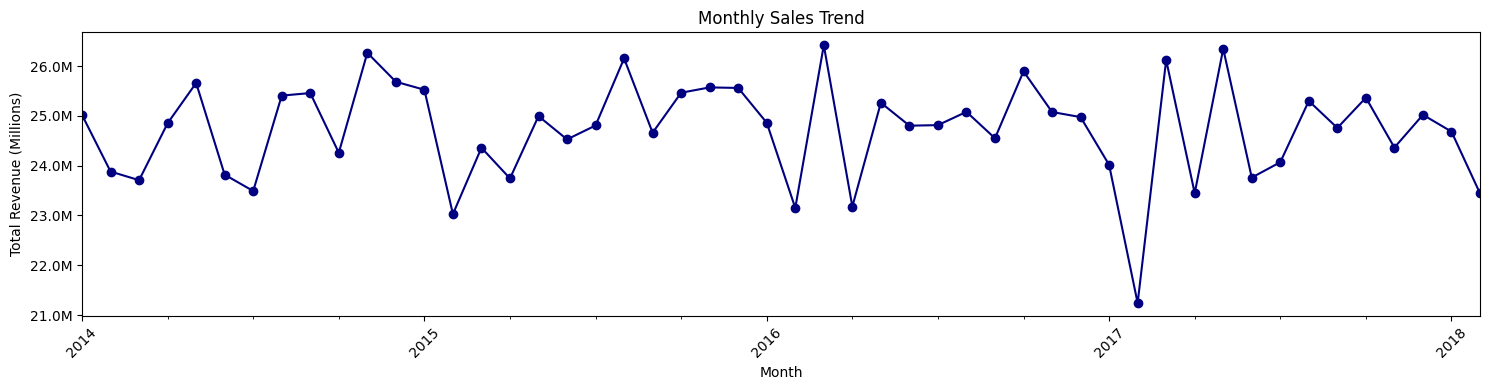

In [ ]:
df['order_month']=df['order_date'].dt.to_period('M')
monthly_sale=df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sale.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

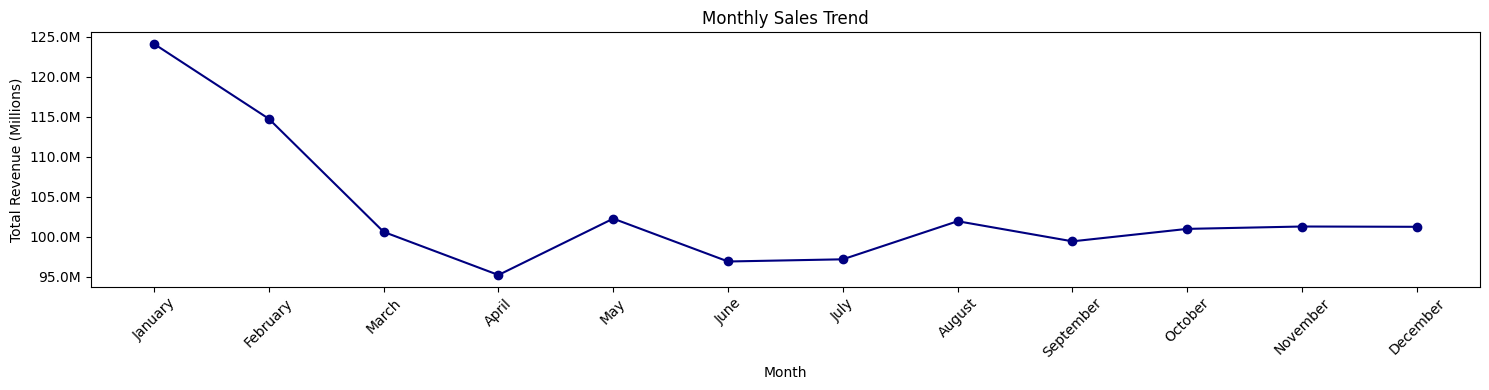

In [ ]:
df['order_month_name']=df['order_date'].dt.month_name()

df['order_month_number']=df['order_date'].dt.month

monthly_sale=df.groupby(['order_month_number','order_month_name'])['revenue'].sum().sort_index()

plt.figure(figsize=(15,4))

plt.plot(monthly_sale.index.get_level_values('order_month_name'), monthly_sale.values, marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

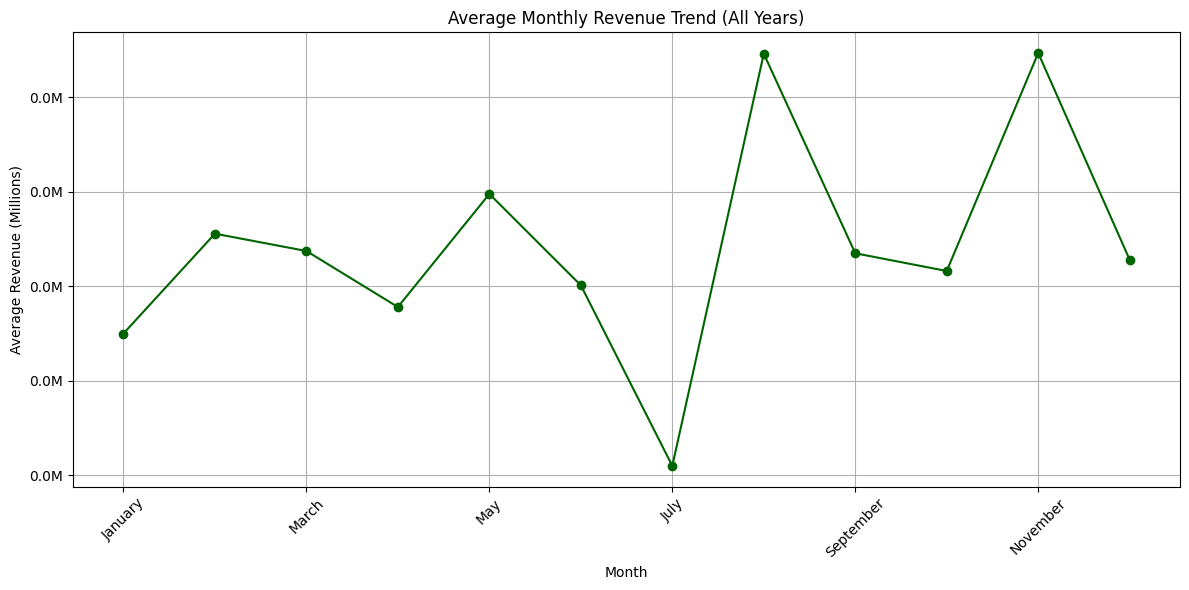

In [ ]:
# Calculate average monthly revenue across all years
average_monthly_revenue = df.groupby('order_month_name')['revenue'].mean()

# Sort the months for proper plotting order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
average_monthly_revenue = average_monthly_revenue.reindex(month_order)

# Plot the average monthly revenue trend
plt.figure(figsize=(12, 6))
average_monthly_revenue.plot(marker='o', color='darkgreen')

# Format y-axis labels to show millions
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Average Monthly Revenue Trend (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-111-2708187754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')


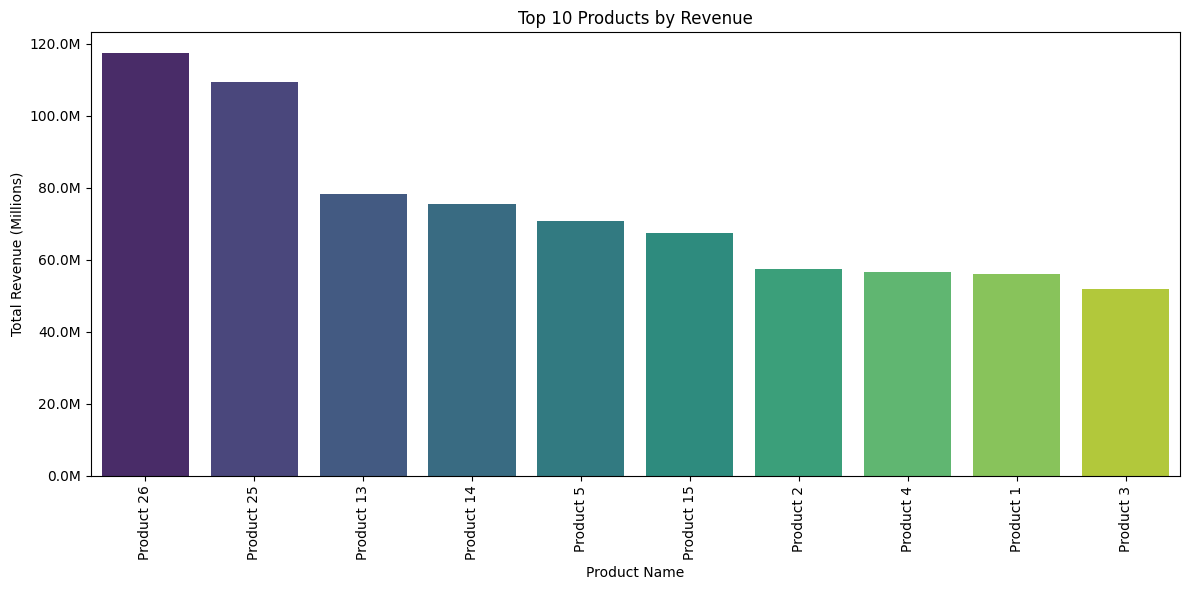

In [ ]:


# Top 10 products by revenue
top_10_products = df.groupby('product_name')['revenue'].sum().nlargest(10).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

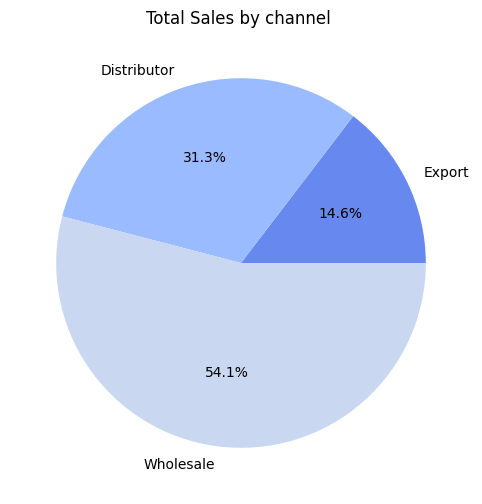

In [ ]:
chan_sales= df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,6))
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by channel ')
plt.show()

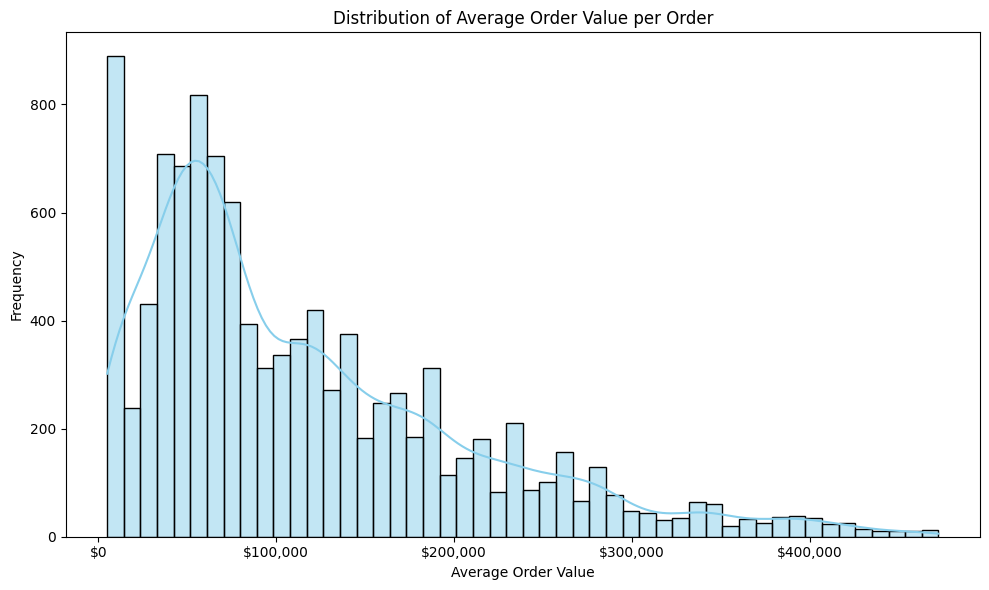

In [ ]:
# prompt: plot average order value distribution groupby order no with respect to revenue

# Calculate Average Order Value (AOV) per order number
aov_per_order = df.groupby('order_number')['revenue'].sum()

# Plot the distribution of AOV
plt.figure(figsize=(10, 6))
sns.histplot(aov_per_order, kde=True, bins=50, color='skyblue')

formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.title('Distribution of Average Order Value per Order')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Axes: xlabel='state_name'>

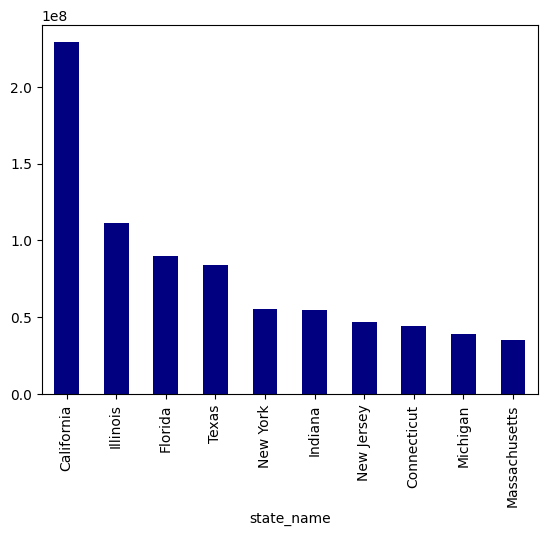

In [ ]:
state_sales=df.groupby('state_name')['revenue'].sum().nlargest(10).sort_values(ascending=False)

state_sales.plot(kind='bar',color='navy')

/tmp/ipython-input-115-434444390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index,y=state_sales.values,palette='viridis')


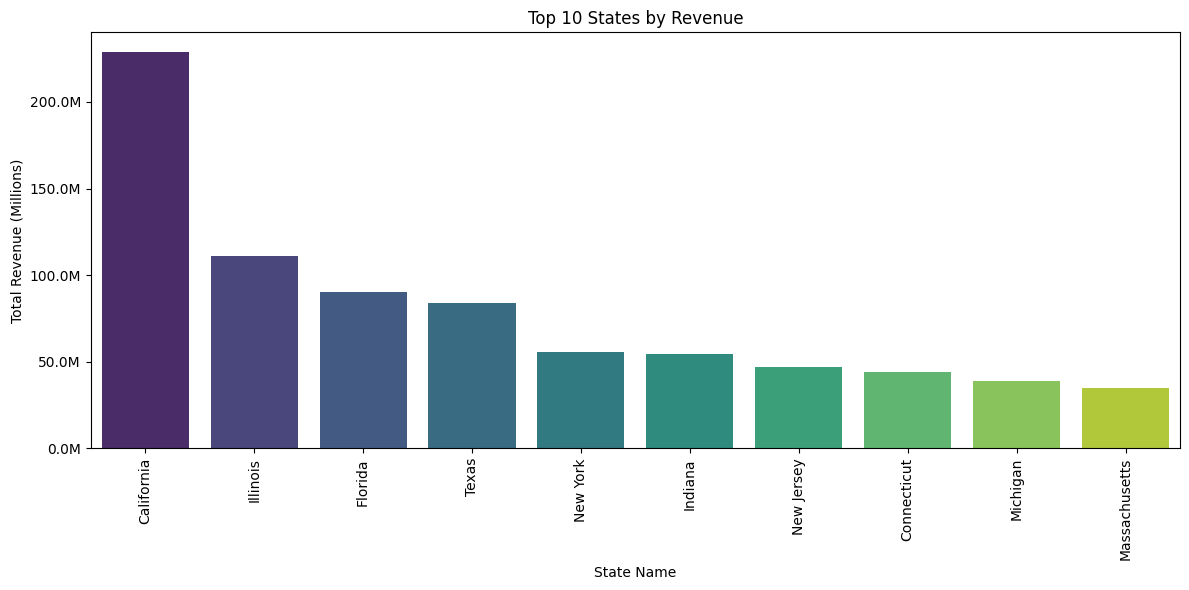

In [ ]:
state_sales=df.groupby('state_name')['revenue'].sum().nlargest(10).sort_values(ascending=False)




plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.index,y=state_sales.values,palette='viridis')

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Top 10 States by Revenue')
plt.xlabel('State Name')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.head(1)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,state_name,lat,lon,budget,total_cost,profit,profit_margin,order_month,order_month_name,order_month_number
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,January,1


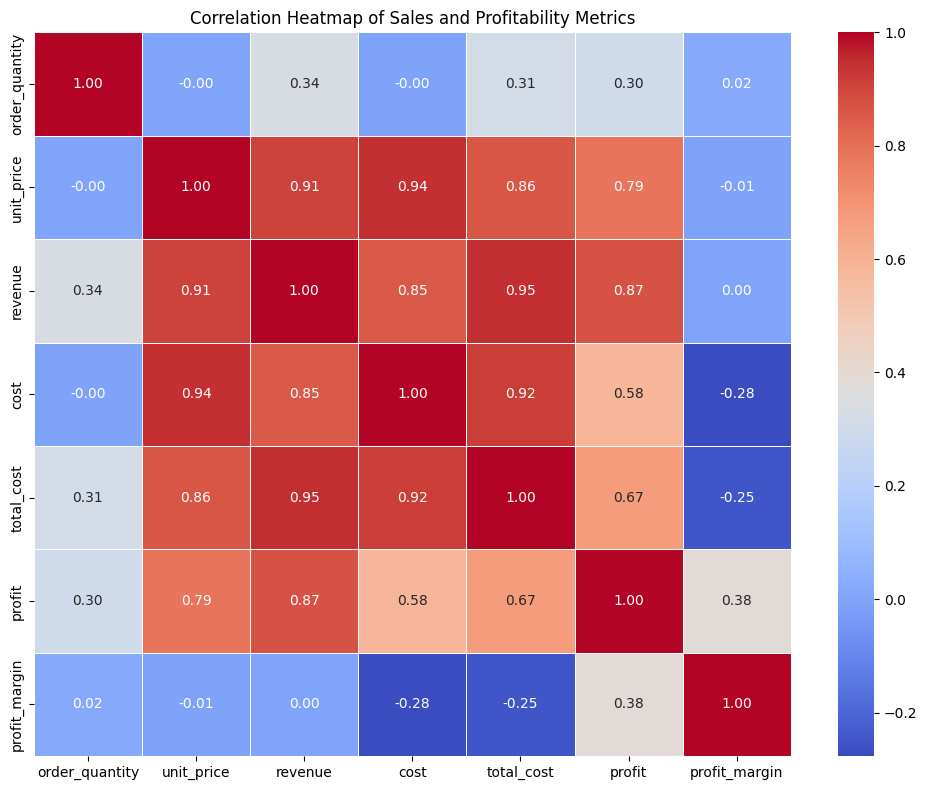

In [ ]:
# Select the numerical columns for the heatmap
numerical_cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'total_cost', 'profit', 'profit_margin']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap of Sales and Profitability Metrics')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('sales_data')

In [119]:
df.to_csv('sales_data.csv', index=False)